<img src="Branded_Logo_CUDenver.PNG" width="150">

## <center>CSCI 4580/5580 – Data Science – Spring 2025</center>
<center>Lab 8: Deep Learning</center><center><font color='red'>Deadline: April 18, 2025 - 11:59 PM</font></center><center>Total Points: 100</center>

## Instructions
- Please note that this assignment must be done individually. By submitting this assignment, you certify that this is your own work, your code will be checked against other submissions and resources using automatic tools. Everyone should be getting a hands on experience in this course. You are free to discuss course material with fellow students, and we encourage you to use Internet resources to aid your understanding, but the work you turn in, including all code and answers, must be your own work.

## Deliverables
You need to submit a single .ipynb file on Canvas, named your-lastname_your-first-name.ipynb. For example, if your name is John Smith, you should name the file smith_john.ipynb.
- Please do not include extra files such as the input datasets in your submission.
- Answer Questions 1 - 9 in the designated cells. Please do not add or remove any cells. 
- Please download your submission file after submission and make sure it is not corrupted. Use the 'Run All' option from the 'Cell' menu to ensure all cells run without any issues. We will not be responsible for corrupted submissions and will not take a resubmission after the deadline.

## Need Help?
If you need help with this lab, please email me at sundous.hussein@ucdenver.edu or come to my office hours. We also encourage you to ask your questions on the designated channel for the assignment on Microsoft Teams. This way, you may receive assistance from your classmates that might’ve ran through the same issues.

# IMPORTANT
For this lab, we highly recommend using the Anaconda environment. In order to properly run this lab, we will need to run a few configuration steps to configure a special environment for loading Keras/Tensorflow.

## Step 1:
We will create a new `conda` environment for Tensorflow. This is because some Tensorflow dependencies conflict with those installed in the `base` conda environment. 

In Anaconda Navigator, launch CMD.exe Prompt and type the following command:


```conda create -n tf tensorflow pandas numpy matplotlib jupyter```

This will create a new virtual environment called `tf` with installed packages `tensorflow`,`pandas`,`numpy`, and `matplotlib`, and `jupyter`. These are the most commonly used packages needed to do the assignment. You should not need any other packages for this lab.

Your terminal should look similar to the below:

<img src="imgs/conda_install.png">

Anaconda will generate a list of required packages and ask you for confirmation to install. Type `y` to continue.

<img src="imgs/install_confirm.png">

Once install is finished, you should activate your new environment by running: 

`conda activate tf`

<img src="imgs/conda_activate.png">

You should see that the environment has activated successfully if `(tf)` appears before your terminal string.

Finally, navigate to the directory containing the Lab 8 notebook, and run `jupyter notebook`.

<img src="imgs/open_jupyter.png">

You should close the version of this notebook that is open in your base anaconda environment, and continue the assignment using the version from the `tf` virtualenv.

**NOTE:** If you leave and come back to the assignment, remember to run `conda activate tf` in your terminal to activate the correct `conda` environment **before** running `jupyter notebook`. 

Let's Get Started!
===

## Overview


Deep Neural Networks are powerful data-driven models, which can learn complex, non-linear representations of data. 
![Simple Neural Network Image](imgs/simple_neural_network.png)
The field of Deep Learning (DL) involves applying large neural networks to solve learning problems like classification, image segmentation, text translation and summarization, and many others. The field of Deep Learning is large, and constantly growing. Although we couldn't hope to provide a complete overview of Deep Learning in a single lab assignment, we have chosen to work with two ubiquitous DL models: 
- Deep Neural Networks - DNN
- Convolutional Neural Networks - CNN

These two model architectures are two of the oldest and simplest architectures within DL literature. In this lab, we will experiment both a DNN and CNN architecture. Because not everyone owns their own GPU-equipped compute cluster we will be using scaled-down versions of these architectures, which are trainable on a laptop within a few minutes or less!

Although we cannot provide a complete background of the math behind neural networks here, each of the two sections has a small introduction that provides some of the basic required knowledge.

For an excellent deep-dive into the math behind Deep Learning with applications for Convolutional Neural Networks, check out the [CS231N - Convolutional Neural Networks for Image Recognition](https://cs231n.github.io/convolutional-networks/) course from Stanford. This course also has an associated video lecture series in [this YouTube playlist](https://www.youtube.com/watch?v=vT1JzLTH4G4&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk).

This course provides lectures about:
- Introduction to Neural Networks
- Image Classification
- Loss Functions/Optimization
- Computational Graphs and Backpropogation
- and much more!

Another great resource for learning about Deep Learning is the [Deep Learning Book from MIT Press](https://www.deeplearningbook.org/). This book is free to access online, and contains information about many types of architectures and fields of research within Deep Learning.


### Application


Deep Learning Architectures can be applied in virtually any application domain. Convolutional architectures can be used for object recognition, or to perform object recognition and tracking within images or videos. 

![localize](imgs/localization_detection.png)
*Image Credit: [Analytics India Mag](https://analyticsindiamag.com/top-5-image-classification-research-papers-every-data-scientist-should-know/)*

Sequence models such as [LSTMs](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) and [Transformer](https://en.wikipedia.org/wiki/Transformer_(machine_learning_model)) architectures can be used to perform text translation, summarization, or other NLP tasks. 

For the sake of time and ease of learning, we will be using small-scale neural network architectures that we design and implement in the Keras deep learning framework. Keras is a high-level wrapper for Tensorflow, Google's open source Deep Learning library. Tensorflow is an extraordinarily powerful framework, and Keras has distilled many of the most common operations and applications in Tensorflow into a user-friendly API.

We will use the same subset of MNIST data that we used for prior labs and assignments in this lab as well. This data contains a total 6000 images from MNIST and also provides a pre-made train/test split, using 4000 images for training and 2000 images for testing/validation.

In the following code, you will design and implement a DNN and CNN architecture and evaluate their performance on this MNIST dataset.

### Files

Data files for this assignment are:

* **train.fmat.txt**, MNIST Training Images
* **ictrain.imat.txt**, MNIST Training Labels
* **test.fmat.txt**, MNIST Testing Images
* **ictest.imat.txt**, MNIST Testing Labels


## Part 0: Preliminaries
Download the data from Canvas:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
# Required if you are running on MacOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

2025-04-11 15:01:15.876125: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 15:01:15.885750: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-11 15:01:15.888819: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-11 15:01:15.896338: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Q0 [10 points]
Load each of the four files into NumPy array objects. You may use whatever method you like to load the data (we recommend `np.loadtxt`), but your variables must all be NumPy arrays.

* `train.fmat.txt` and `test.fmat.txt` are `train_data` and `test_data` respectively.
* `ictrain.imat.txt` and `ictest.imat.txt` are `train_labels` and `test_labels` respectively.

After loading the data, transpose the data arrays so that each row is a sample/image.

The first dimensions of your `train_data` and `train_labels` should match, as well as the first dimensions of `test_data` and `test_labels`.

In [2]:
# Add your code here
train_data = np.loadtxt('train.fmat.txt').T
train_labels = np.loadtxt('ictrain.imat.txt').T
test_data = np.loadtxt('test.fmat.txt').T
test_labels = np.loadtxt('ictest.imat.txt').T

# Test cases
assert(train_labels.shape[0] == 4000)
assert(test_labels.shape[0] == 2000)
assert(train_data.shape[0] == train_labels.shape[0])
assert(test_data.shape[0] == test_labels.shape[0])

### Q1 [10 points]

In order to ensure that our data works well inside the DNN, we need to first normalize it so that the pixel values fall in the range $[0,1]$. Create two variables `train_data_norm` and `test_data_norm` to hold the normalized training and testing data, respectively.

**HINT:** Currently, the images are grayscale single-channel images with values in the range $[0,255]$.
**DOUBLE HINT:** You don't need to use a loop to perform this normalization.

In [3]:
# Add your code here
train_data_norm = train_data / 255
test_data_norm = test_data / 255

### Q2 [10 points]
The training dataset you loaded in contains `28x28` images of the digits `0-9`. 

For each of the classes `0-9` compute and display the "average" image for that class in the training dataset (i.e. `train_data` and `test_data`). 

Your code should display exactly 10 images. We recommend using the `plt.subplots` function to generate a figure with 10 subplots, then plotting each digit.

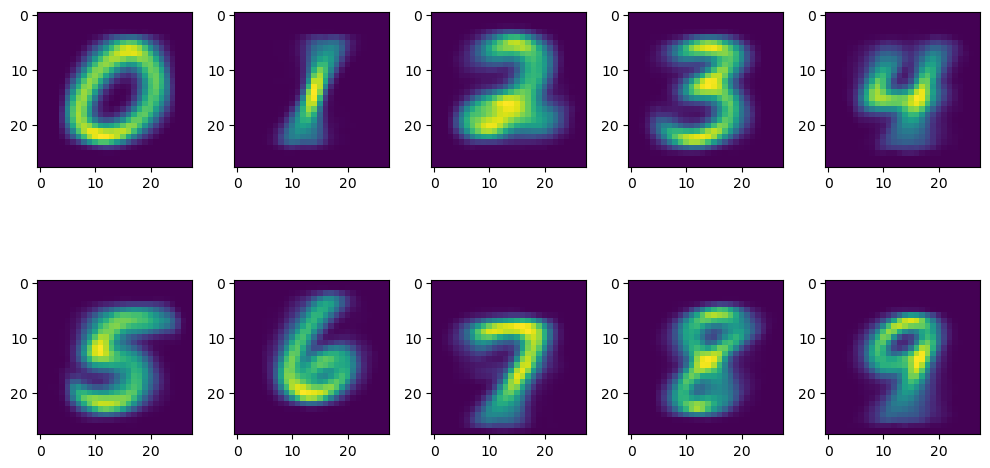

In [4]:
# Add your code here
fig,ax = plt.subplots(2,5, figsize=(10, 6))

for row in range(2):
    for column in range(5):
        
        num = row * 5 + column
        indices = [i for i, x in enumerate(train_labels) if x == num]
        class_images = [train_data[i] for i in indices]
        class_avg = np.mean(np.stack(class_images), axis=0) # np.stack stacks list of arrays along given axis
        
        ax[row, column].imshow(class_avg.reshape(28, 28))

plt.tight_layout()
plt.show()

## Part 1: Dense Neural Network

One of the simplest and most generally applicable implementations of a neural network is the Dense Neural Network, or DNN.

A DNN is comprised of one or more dense layers, each of which applies a non-linear transformation to the input data.

This non-linear transformation is implemented as a weighted sum of each input dimension.

For a small example, consider a data matrix $x$ with dimensions $(1,d)$ where $d=4$. The number of rows in this matrix (in this case 1) represents the number of samples in our data. $d$ represents the number of dimensions, which we have set to 4 for this example.
$$ x = \begin{bmatrix}
            1 & 2 & 3 & 1
        \end{bmatrix}$$
        
To perform the non-linear transformation, we will first multiply this vector by a matrix $W$ containing learned weights.

$$ W = \begin{bmatrix}
            1 & 0\\
            0.5 & 1\\
            0.5 & 2\\
            0 & 1
       \end{bmatrix}$$
       
We can multiply $x$ by $W$ in the form:
$$ 
xW = \begin{bmatrix}
            1 & 2 & 3 & 1
        \end{bmatrix}
        \begin{bmatrix}
            1 & 0\\
            0.5 & 1\\
            0.5 & 2\\
            0 & 1
       \end{bmatrix}  =  
       \begin{bmatrix}
        3.5 & 9\\
        \end{bmatrix}
      $$
      
Notice that each column of the weight matrix $W$ applies a separate weighted sum to the dimensions of $x$. Our output matrix has dimensions 1x2 because the matrix $W$ has two columns. The number of rows in $W$ must always match the number of columns in $x$, but the number of columns in $W$ is arbitrary, and defines the *output dimensionality* for our neural network layer.

In general, we can regard the operation $xW$ as mapping the data from an $d$-dimensional space to a $m$-dimensional space, where $m$ is the number of columns in weight matrix $W$.

If we examine the shapes of both matrices, we can see that the inner dimensions cancel due to the matrix multiplcation:

$$ (1,d) * (d,2) = (1,2) $$

In this case, we performed the weighted sum operation on a single example. However, we can perform the operation on multiple examples (called a batch) by simply changing the number of samples of our input data. For an input data matrix of shape $(N,4)$, the output $xW$ will always be of shape $(N,2)$ since:

$$ (N,4) * (4,2) = (N,2) $$

In practice, we refer to $N$ as the *batch size* and $m$ as the number of *output units*.

After performing the operation $xW$, we also add a learned bias term $b$, which is a matrix of $(1,m)$. Similar to the intercept term in a linear regression, the value $b$ represents the output value when the weighted sum is 0. 

Our intermediate output term is:

$$ xW+b $$ which encompasses a weighted sum $xW$ followed by an addition $b$.

Up until this point, we have simply applied a linear transformation to $x$. The final step is to apply an *activation function*, commonly written as $\sigma$. The activation function provides a non-linear element to the neural network layer, and is the key to why neural networks can learn more complex functions than other types of models.

The final equation for the output of a DNN layer $L$ is:

$$ l = \sigma(xW+b)$$

To form a dense neural network, we can simply feed the output of one dense layer into another dense layer as follows:

$$ l_1 = \sigma(x*W_1 + b_1)$$
$$ l_2 = \sigma(l_1*W_2 + b_2)$$
$$ l_2 = \sigma( \sigma(x*W_1 + b_1) * W_2 + b_2) $$

$\sigma$ is an arbitrary non-linear function which has a first derivative. Common choices include:

Sigmoid:

$ \begin{align} sigmoid(x) = \frac{1}{1-e^{-x}} \end{align}$

ReLu (Rectified Linear Unit): 

$ \begin{align} ReLu(x) = max(0,x) \end{align}$

and hyperbolic tangent function: 

$ \begin{align} tanh(x) \end{align}$

### Q3 [10 points]

Suppose that you have a dataset that contains 10 dimensions per sample. You want to use a single-layer neural network to classify this data into one of 3 different classes. To perform this classification, your neural network layer needs to produce an output vector $\hat{y}$ with 3 dimensions, one for each class. 

Specify the shapes of your weight matrix $W$ and bias vector $b$ for this dataset. 


### Building a Neural Network
Let's start by building a two-layer DNN to classify our MNIST images. We would like our DNN to accept a 784-dimensional vector (28x28 image) and produce a 10-dimensional output vector $\hat{y}$, where the $\hat{y}[i]$ represents the probability that the given image is of digit $i$. 

To do this, we will use the `keras` package from `tensorflow`. Keras provides a high-level interface for quickly building neural networks. 

First, we need to create the layers for our DNN. We specified a two-layer neural network, with a final unit size of 10. 

We first need to create an `Input` layer, to define the dimensionality of our input data.

In [5]:
input_dims = 784
input_layer = keras.Input((input_dims, ),name="input_layer")
print(input_layer)

<KerasTensor shape=(None, 784), dtype=float32, sparse=False, name=input_layer>


Great! We have successfully built the input layer.

Now, let's build the two neural network layers we need for our DNN.

### Q4 [10 points]

Fill in the output sizes for the two layers of our neural network. 

Layer 1 should have an output dimensionality of 64

Layer 2 should have an output dimensionality of 10

In [6]:
layer_1_units = 64
layer_2_units = 10

dense_layer_1 = keras.layers.Dense(layer_1_units,activation="sigmoid",name="dense_layer_1")
dense_layer_2 = keras.layers.Dense(layer_2_units,activation="softmax",name="dense_layer_2")

### Q5 [10 points]

Create a list called `layers` which contains all of the layers we have created in order, starting with the input layer and ending with our final dense layer.

In [7]:
layers = [input_layer,dense_layer_1,dense_layer_2]

Now we can finally build our model!

Let's create a Keras `Sequential` model object, so that we can link all of our created layers together.

In [8]:
model = keras.Sequential(layers=layers)
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

I0000 00:00:1744405277.511072  918225 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1744405277.545941  918225 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1744405277.546148  918225 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1744405277.547248  918225 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer_1 (Dense)                │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

By calling `model.summary()` we can see a quick overview of our model's architecture. 

This model contains two layers: `dense_layer_1` and `dense_layer_2`, which are both dense layers.

The `Output Shape` column contains tuples showing the output shape at each layer as a tuple of (N *(batch size)*, m *(output units)*). As mentioned previously, the batch size $N$ is an arbirtrary parameter, which we may choose during training. To represent this, keras places a `None` value in the batch dimension. The output units value $m$ for `dense_layer_1` is 64, since we determined this. The output units value $m$ for `dense_layer_2` should be the correct size for a classification with 10 classes.

In the next step, we will fit the model using our training and validation data.

In [9]:
history = model.fit(train_data_norm,train_labels,epochs=25,validation_data=(test_data_norm,test_labels))

Epoch 1/25


I0000 00:00:1744405278.419304  918316 service.cc:146] XLA service 0x7f7fac0073e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744405278.419325  918316 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2025-04-11 15:01:18.430540: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-04-11 15:01:18.464742: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.5046 - loss: 1.8334

I0000 00:00:1744405278.857083  918316 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5087 - loss: 1.8248 - val_accuracy: 0.7745 - val_loss: 1.0805
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8455 - loss: 0.8450 - val_accuracy: 0.8290 - val_loss: 0.7586
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.8781 - loss: 0.5777 - val_accuracy: 0.8490 - val_loss: 0.6125
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.9010 - loss: 0.4468 - val_accuracy: 0.8600 - val_loss: 0.5357
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.9060 - loss: 0.3916 - val_accuracy: 0.8610 - val_loss: 0.4940
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.9258 - loss: 0.3212 - val_accuracy: 0.8695 - val_loss: 0.4565
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.9219 - loss: 0.3103 - val_accuracy: 0.8685 - val_loss: 0.4396
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.9339 - loss: 0.2608 - val_accuracy:

The `history` object is the return value for our call to `model.fit`. This object records the training and testing accuracy for our model.

The `history.history` element is a dictionary containing lists of:
- Loss - The model's average training loss at each epoch.
- Accuracy - The model's training accuracy evaluated at each epoch.
- Val Loss - The model's average validation (testing) loss at each epoch.
- Val Accuracy - The model's validation accuracy at each epoch.

In [10]:
hist_dict = history.history
print(hist_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Q6 [10 points]
Now that we have the history for our model training saved in `hist_dict`, create two plots to visualize our model's performance.

Plot 1 should compare the *training loss* and *testing loss* for during training. X-axis should be the epoch number, and Y-axis should be the values for training and testing loss. 

Plot 2 should compare *training accuracy* and *testing accuracy* during training. As above, X-axis should be epoch number, and Y-axis should be training/testing accuracy.

Be sure to label your charts.

What do you observe about the values for training and testing loss?
Is training loss higher/lower than testing loss? Do you expect this result?
Is training accuracy higher/lower than testing accuracy? Do you expect this result?

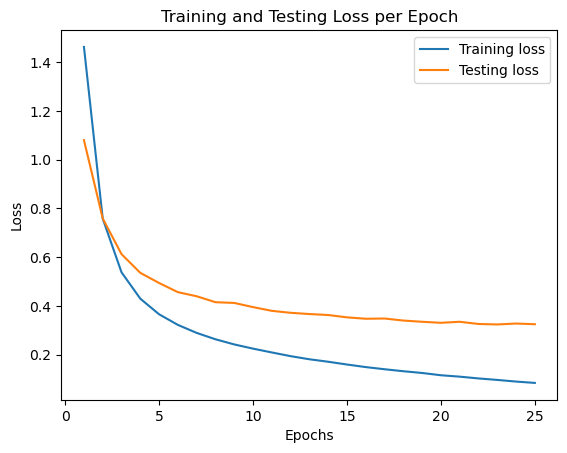

In [11]:
# Create Training/Testing Loss Chart Here

epochs = list(range(1, 26))
training_loss = hist_dict['loss']
testing_loss = hist_dict['val_loss']

plt.plot(epochs, training_loss, label='Training loss')
plt.plot(epochs, testing_loss, label='Testing loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss per Epoch')
plt.legend()
plt.show()

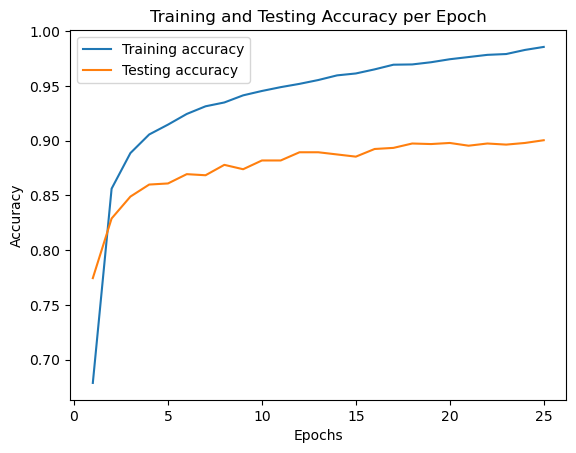

In [12]:
# Create Training/Testing Accuracy Chart Here

training_acc = hist_dict['accuracy']
testing_acc = hist_dict['val_accuracy']

plt.plot(epochs, training_acc, label='Training accuracy')
plt.plot(epochs, testing_acc, label='Testing accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy per Epoch')
plt.legend()
plt.show()

From the plots above, training loss starts off greater than testing loss, but after a few epochs it shrinks less than testing loss. This is to be expected, and overall the gap between training/testing loss stays pretty consistent, but a widened margin can help indicate when the model is beginning to overfit. Similarly, the training accuracy begins lower than testing accuracy, but then exceeds testing accuracy after a few epochs. This too is expected because the model is initially underfitting.

## Part 2: Convolutional Neural Networks (CNNs)

Convolutional neural networks (CNNs) are a specialized version of neural networks which may be used when there are spatial or temporal relationships between points in the input data.

For example, in our digit images, pixels that are spatially close to each other often have related values (i.e., if one pixel has a high value, it is likely that others around it may also have high values).

### Convolutional Layers
Convolutional networks work by sliding small windows, called *filters*, containing trainable weights over the input data. These weights apply at multiple positions on the input image, wheras each weight from the DNN applies at only one position in the input data. This means that CNNs are capable of learning patterns that are invariant to position in the input. This is, for example, why an image classification network is capable of recognizing objects within images, even if the objects do not always appear in the same place in each image. 

![Convolutional Layer Animation](imgs/conv_layers.gif)
*Image Credit: [Stanford CS231n](https://cs231n.github.io/convolutional-networks/)*

In the above image, the *blue squares* represent a 5x5 image (7x7 with the zero padding) with three channels. The image is being convolved with 2 3x3 filters (the *red squares*), which each operate over all three channels. The convolution operation takes performs a weighted sum of the input image (*blue square*) values, using the filter values (*red squares*) as the weights. 

For a 3x3 input image window $I$:

$$ 
I =  \begin{bmatrix}
            i_0 & i_1 & i_2\\
            i_3 & i_4 & i_5\\
            i_6 & i_7 & i_8\\
       \end{bmatrix} 
      $$

and 3x3 filter $F$:

$$ 
F =  \begin{bmatrix}
            f_0 & f_1 & f_2\\
            f_3 & f_4 & f_5\\
            f_6 & f_7 & f_8\\
       \end{bmatrix} 
      $$

The resulting dot product can be written as: $$ dot =  i_0 \cdot f_0 + i_1 \cdot f_1 + \ldots + i_8 \cdot f_8 $$

Note that this is *not* a matrix multiplication between $I$ and $F$, it is simply a dot product between the corresponding elements of $I$ and $F$, resulting in a single **scalar** output value. The dot products are applied over each channel, then summed together along with the scalar bias $b$ to return a single scalar value representing the activation for this location in the image. After this step, we would typically apply a non-linear activation $\sigma$ as with the DNN example. The ReLu activation is the most common choice for activation function in CNNs.

### Max Pooling Layer
Another common feature of the Convolutional Neural Network is the Max Pooling layer. This layer works similarly to a convolutional layer, in that it slides a window across the data. However, the max pooling layer will select the largest (max) input from each window position, and discard the rest of the inputs. This means that only the highest activation value for each window position is kept. Max-pooling layers help to reduce the dimensionality of the data.

![Max Pooling Example](imgs/maxpool.png)
*Image Credit: [Computer Science Wiki](https://computersciencewiki.org/index.php/Max-pooling_/_Pooling)*

Large state-of-the-art models contains large numbers of convolutional, max-pooling, and other types of layers (which we do not discuss here for sake of time).

The image below is of the InceptionV3 architecture, which at one point was considered the state-of-the-art classifcation network for the ImageNet image dataset.

![InceptionV3](imgs/Inception_V3.png)
*Image Credit: [cloud.google.com](https://cloud.google.com/tpu/docs/inception-v3-advanced)*

As you can see, this model architecture is complex, and contains millions of trainable parameters. Although we will not use it in this lab, the InceptionV3 architecture is also implemented as a pre-built architecture in Keras! Take a look at the [Keras documentation](https://keras.io/api/applications/inceptionv3/) for more information. 

If you are interested, also check out the [ImageNet Classification Ranking](https://paperswithcode.com/sota/image-classification-on-imagenet) for an up-to-date ranking of networks on the ImageNet dataset. Even though InceptionV3 was state-of-the-art when it was released in 2015, currently it only ranks 121st! This just goes to show the extremely rapid pace of research, iteration, and development in the Deep Learning field.

In order to keep training time manageable for this lab, we will be implementing a (much) smaller architecture with two convolutional layers, two max-pooling layers, and a final classifcation dense layer.

Let's get started!

## Q7 [10 points]
Right now our input data is in "flattened" form to be processed by our DNN. Since the CNN architecture can make use of the spatial relationships between pixels in our image, we need to reshape our data back to image format.

For both `train_data_norm` and `test_data_norm`, create new variables `train_data_rsp` and `test_data_rsp` which reshape the data to be (num_samples, 28, 28, 1). This format stores each image in a 28x28x1 tensor (the final 1 represents the number of channels in the image. Our images are grayscale, so there is only 1 channel).

In [13]:
# Add your code here

train_data_rsp = train_data_norm.reshape(train_data_norm.shape[0], 28, 28, 1)
test_data_rsp = test_data_norm.reshape(test_data_norm.shape[0], 28, 28, 1)

In [14]:
conv_input_size = (28,28,1)
conv_input_layer = keras.Input(conv_input_size,name="conv_input")
print(conv_input_layer)

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=conv_input>


In [15]:
conv_layer_1 = keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu",name="conv_layer_1")
maxpool_1 = keras.layers.MaxPooling2D(pool_size=(2,2),name="maxpool_1")
conv_layer_2 = keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu",name="conv_layer_2")
maxpool_2 = keras.layers.MaxPooling2D(pool_size=(2,2),name="maxpool_2")
flatten = keras.layers.Flatten()
conv_class_layer = keras.layers.Dense(10,activation="softmax")

In [16]:
conv_layers = [conv_input_layer,
               conv_layer_1,
               maxpool_1,
               conv_layer_2,
               maxpool_2,
               flatten,
               conv_class_layer]

In [17]:
conv_model = keras.Sequential(layers=conv_layers)
conv_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_layer_1 (Conv2D)                │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_1 (MaxPooling2D)             │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_2 (MaxPooling2D)             │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
conv_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [19]:
conv_hist = conv_model.fit(train_data_rsp,train_labels,epochs=25,validation_data=(test_data_rsp,test_labels))
conv_hist_dict = conv_hist.history

Epoch 1/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5875 - loss: 1.4255 - val_accuracy: 0.8860 - val_loss: 0.3527
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9247 - loss: 0.2458 - val_accuracy: 0.9225 - val_loss: 0.2422
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9524 - loss: 0.1585 - val_accuracy: 0.9500 - val_loss: 0.1602
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9725 - loss: 0.1031 - val_accuracy: 0.9595 - val_loss: 0.1421
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9768 - loss: 0.0908 - val_accuracy: 0.9475 - val_loss: 0.1590
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9817 - loss: 0.0669 - val_accuracy: 0.9615 - val_loss: 0.1200
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9871 - loss: 0.0435 - val_accuracy: 0.9590 - val_loss: 0.1417
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9857 - loss: 0.0420 - val_accuracy: 0.

In [20]:
print(conv_hist_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### Q8 [10 points]

Just as above, provide 2 plots visualizing the performance of the CNN on this dataset.

Plot 1 should compare the *training loss* and *testing loss* for during training. X-axis should be the epoch number, and Y-axis should be the values for training and testing loss. 

Plot 2 should compare *training accuracy* and *testing accuracy* during training. As above, X-axis should be epoch number, and Y-axis should be training/testing accuracy.

Be sure to label your charts.

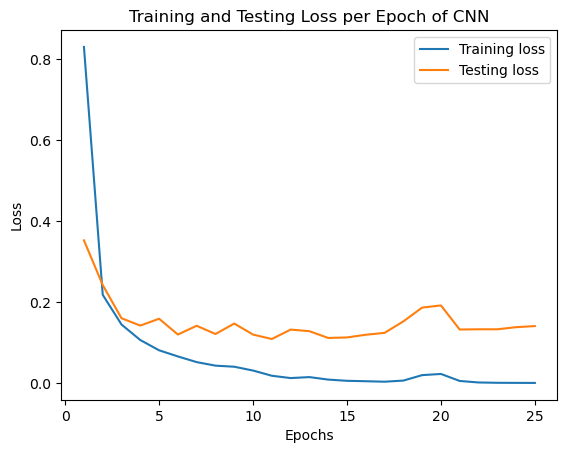

In [21]:
# Create Training/Testing Loss Chart Here

epochs = list(range(1, 26))
training_loss = conv_hist_dict['loss']
testing_loss = conv_hist_dict['val_loss']

plt.plot(epochs, training_loss, label='Training loss')
plt.plot(epochs, testing_loss, label='Testing loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss per Epoch of CNN')
plt.legend()
plt.show()

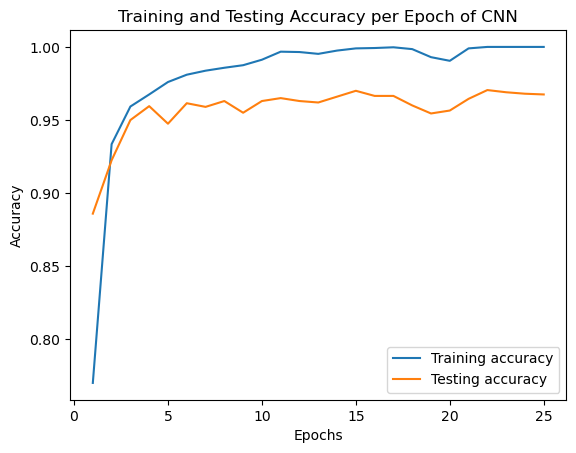

In [22]:
# Create Training/Testing Accuracy Chart Here

training_acc = conv_hist_dict['accuracy']
testing_acc = conv_hist_dict['val_accuracy']

plt.plot(epochs, training_acc, label='Training accuracy')
plt.plot(epochs, testing_acc, label='Testing accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy per Epoch of CNN')
plt.legend()
plt.show()

### Q9 [10 points]

Answer the following questions with a few sentences each to discuss the performance of these two models.

1. Which of the two models performed better on the testing data?
    - Why do you think this is?

2. Which model had fewer trainable parameters? 

3. What do trainable parameters values mean and how are they derived? (Trainable parameter values for each layer are found in the calls to `model.summary()` for the DNN model and `conv_model.summary()` for the CNN model.
    - **HINT:** Add up the number of elements in both the weight and bias matrices, and compare to the trainable parameter size for each layer.
4. Do you expect that the model with the largest number of parameters will always perform best?

1. The CNN model performed better on the testing data which is due to several possible reasons, including: applying small filters which can enhance information gained, sharing weights, and fewer parameters generalizes better without overfitting.

2. The CNN model had fewer trainable parameters.

3. Trainable parameters are neurons that are interconnected across layers, both weights and biases, which reflect the behavior of a model. This can be derived by the sum of (inputs * neurons (number of weight terms) + neurons (number of bias terms)) across each layer of the model.

4. The model with the largest number of parameters will not always perform best, which is reflected in this example where the CNN had fewer parameters and still performed better.

Done! Save and submit your notebook on Canvas!